# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp19 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,50mi"  # defin the location, in Harrisonburg, VA
q = "covid"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 22 23:57:07 +0000 2020'
'Sun Nov 22 23:55:01 +0000 2020'
'Sun Nov 22 23:54:47 +0000 2020'
'Sun Nov 22 23:54:23 +0000 2020'
'Sun Nov 22 23:49:21 +0000 2020'
'Sun Nov 22 23:46:49 +0000 2020'
'Sun Nov 22 23:44:40 +0000 2020'
'Sun Nov 22 23:43:07 +0000 2020'
'Sun Nov 22 23:35:56 +0000 2020'
'Sun Nov 22 23:33:46 +0000 2020'
'Sun Nov 22 23:30:21 +0000 2020'
'Sun Nov 22 23:27:13 +0000 2020'
'Sun Nov 22 23:25:43 +0000 2020'
'Sun Nov 22 23:25:43 +0000 2020'
'Sun Nov 22 23:23:20 +0000 2020'
'Sun Nov 22 23:21:10 +0000 2020'
'Sun Nov 22 23:20:00 +0000 2020'
'Sun Nov 22 23:19:46 +0000 2020'
'Sun Nov 22 23:19:36 +0000 2020'
'Sun Nov 22 23:18:46 +0000 2020'
'Sun Nov 22 23:13:15 +0000 2020'
'Sun Nov 22 23:08:13 +0000 2020'
'Sun Nov 22 22:57:28 +0000 2020'
'Sun Nov 22 22:54:12 +0000 2020'
'Sun Nov 22 22:45:10 +0000 2020'
'Sun Nov 22 22:40:39 +0000 2020'
'Sun Nov 22 22:38:38 +0000 2020'
'Sun Nov 22 22:38:28 +0000 2020'
'Sun Nov 22 22:38:15 +0000 2020'
'Sun Nov 22 22:34:45 +0000 2020'
'Sun Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 22 19:27:43 +0000 2020'
'Sun Nov 22 19:25:37 +0000 2020'
'Sun Nov 22 19:23:54 +0000 2020'
'Sun Nov 22 19:23:14 +0000 2020'
'Sun Nov 22 19:22:40 +0000 2020'
'Sun Nov 22 19:21:41 +0000 2020'
'Sun Nov 22 19:17:47 +0000 2020'
'Sun Nov 22 19:15:19 +0000 2020'
'Sun Nov 22 19:14:19 +0000 2020'
'Sun Nov 22 19:10:52 +0000 2020'
'Sun Nov 22 19:10:06 +0000 2020'
'Sun Nov 22 19:05:00 +0000 2020'
'Sun Nov 22 18:59:16 +0000 2020'
'Sun Nov 22 18:53:08 +0000 2020'
'Sun Nov 22 18:52:57 +0000 2020'
'Sun Nov 22 18:49:49 +0000 2020'
'Sun Nov 22 18:46:03 +0000 2020'
'Sun Nov 22 18:43:29 +0000 2020'
'Sun Nov 22 18:42:27 +0000 2020'
'Sun Nov 22 18:41:03 +0000 2020'
'Sun Nov 22 18:40:00 +0000 2020'
'Sun Nov 22 18:39:05 +0000 2020'
'Sun Nov 22 18:34:57 +0000 2020'
'Sun Nov 22 18:29:20 +0000 2020'
'Sun Nov 22 18:22:17 +0000 2020'
'Sun Nov 22 18:20:29 +0000 2020'
'Sun Nov 22 18:15:50 +0000 2020'
'Sun Nov 22 18:15:15 +0000 2020'
'Sun Nov 22 18:13:33 +0000 2020'
'Sun Nov 22 18:11:56 +0000 2020'
'Sun Nov 2

'Sun Nov 22 03:02:25 +0000 2020'
'Sun Nov 22 03:02:15 +0000 2020'
'Sun Nov 22 02:59:31 +0000 2020'
'Sun Nov 22 02:51:47 +0000 2020'
'Sun Nov 22 02:40:16 +0000 2020'
'Sun Nov 22 02:39:32 +0000 2020'
'Sun Nov 22 02:38:17 +0000 2020'
'Sun Nov 22 02:33:16 +0000 2020'
'Sun Nov 22 02:31:32 +0000 2020'
'Sun Nov 22 02:28:28 +0000 2020'
'Sun Nov 22 02:26:50 +0000 2020'
'Sun Nov 22 02:10:46 +0000 2020'
'Sun Nov 22 02:10:17 +0000 2020'
'Sun Nov 22 02:01:52 +0000 2020'
'Sun Nov 22 02:00:04 +0000 2020'
'Sun Nov 22 01:55:38 +0000 2020'
'Sun Nov 22 01:55:27 +0000 2020'
'Sun Nov 22 01:49:57 +0000 2020'
'Sun Nov 22 01:47:24 +0000 2020'
'Sun Nov 22 01:46:11 +0000 2020'
'Sun Nov 22 01:46:03 +0000 2020'
'Sun Nov 22 01:43:32 +0000 2020'
'Sun Nov 22 01:35:58 +0000 2020'
'Sun Nov 22 01:35:23 +0000 2020'
'Sun Nov 22 01:33:29 +0000 2020'
'Sun Nov 22 01:31:39 +0000 2020'
'Sun Nov 22 01:31:28 +0000 2020'
'Sun Nov 22 01:30:03 +0000 2020'
'Sun Nov 22 01:23:16 +0000 2020'
'Sun Nov 22 01:18:18 +0000 2020'
'Sun Nov 2

'Sat Nov 21 16:31:00 +0000 2020'
'Sat Nov 21 16:30:06 +0000 2020'
'Sat Nov 21 16:27:17 +0000 2020'
'Sat Nov 21 16:26:03 +0000 2020'
'Sat Nov 21 16:25:27 +0000 2020'
'Sat Nov 21 16:20:21 +0000 2020'
'Sat Nov 21 16:16:17 +0000 2020'
'Sat Nov 21 16:15:40 +0000 2020'
'Sat Nov 21 16:15:03 +0000 2020'
'Sat Nov 21 16:15:00 +0000 2020'
'Sat Nov 21 16:14:23 +0000 2020'
'Sat Nov 21 16:08:22 +0000 2020'
'Sat Nov 21 16:07:55 +0000 2020'
'Sat Nov 21 16:06:11 +0000 2020'
'Sat Nov 21 16:03:59 +0000 2020'
'Sat Nov 21 15:53:05 +0000 2020'
'Sat Nov 21 15:53:03 +0000 2020'
'Sat Nov 21 15:52:59 +0000 2020'
'Sat Nov 21 15:52:13 +0000 2020'
'Sat Nov 21 15:45:30 +0000 2020'
'Sat Nov 21 15:45:10 +0000 2020'
'Sat Nov 21 15:44:28 +0000 2020'
'Sat Nov 21 15:41:15 +0000 2020'
'Sat Nov 21 15:39:01 +0000 2020'
'Sat Nov 21 15:36:02 +0000 2020'
'Sat Nov 21 15:34:00 +0000 2020'
'Sat Nov 21 15:33:02 +0000 2020'
'Sat Nov 21 15:31:29 +0000 2020'
'Sat Nov 21 15:30:18 +0000 2020'
'Sat Nov 21 15:28:58 +0000 2020'
'Sat Nov 2

'Sat Nov 21 05:55:15 +0000 2020'
'Sat Nov 21 05:54:33 +0000 2020'
'Sat Nov 21 05:49:17 +0000 2020'
'Sat Nov 21 05:44:17 +0000 2020'
'Sat Nov 21 05:36:26 +0000 2020'
'Sat Nov 21 05:34:37 +0000 2020'
'Sat Nov 21 05:32:06 +0000 2020'
'Sat Nov 21 05:26:58 +0000 2020'
'Sat Nov 21 05:21:12 +0000 2020'
'Sat Nov 21 05:18:33 +0000 2020'
'Sat Nov 21 05:13:30 +0000 2020'
'Sat Nov 21 05:00:04 +0000 2020'
'Sat Nov 21 04:58:56 +0000 2020'
'Sat Nov 21 04:55:45 +0000 2020'
'Sat Nov 21 04:55:28 +0000 2020'
'Sat Nov 21 04:43:35 +0000 2020'
'Sat Nov 21 04:43:30 +0000 2020'
'Sat Nov 21 04:43:07 +0000 2020'
'Sat Nov 21 04:39:50 +0000 2020'
'Sat Nov 21 04:35:43 +0000 2020'
'Sat Nov 21 04:35:38 +0000 2020'
'Sat Nov 21 04:34:16 +0000 2020'
'Sat Nov 21 04:24:11 +0000 2020'
'Sat Nov 21 04:22:45 +0000 2020'
'Sat Nov 21 04:12:16 +0000 2020'
'Sat Nov 21 04:06:19 +0000 2020'
'Sat Nov 21 04:04:03 +0000 2020'
'Sat Nov 21 04:01:43 +0000 2020'
'Sat Nov 21 03:58:32 +0000 2020'
'Sat Nov 21 03:57:59 +0000 2020'
'Sat Nov 2

'Fri Nov 20 20:53:32 +0000 2020'
'Fri Nov 20 20:47:55 +0000 2020'
'Fri Nov 20 20:45:26 +0000 2020'
'Fri Nov 20 20:44:06 +0000 2020'
'Fri Nov 20 20:41:44 +0000 2020'
'Fri Nov 20 20:41:13 +0000 2020'
'Fri Nov 20 20:40:33 +0000 2020'
'Fri Nov 20 20:40:10 +0000 2020'
'Fri Nov 20 20:39:57 +0000 2020'
'Fri Nov 20 20:37:57 +0000 2020'
'Fri Nov 20 20:36:26 +0000 2020'
'Fri Nov 20 20:31:44 +0000 2020'
'Fri Nov 20 20:27:49 +0000 2020'
'Fri Nov 20 20:27:00 +0000 2020'
'Fri Nov 20 20:25:03 +0000 2020'
'Fri Nov 20 20:22:19 +0000 2020'
'Fri Nov 20 20:19:51 +0000 2020'
'Fri Nov 20 20:19:20 +0000 2020'
'Fri Nov 20 20:18:54 +0000 2020'
'Fri Nov 20 20:15:24 +0000 2020'
'Fri Nov 20 20:11:40 +0000 2020'
'Fri Nov 20 20:07:18 +0000 2020'
'Fri Nov 20 20:04:10 +0000 2020'
'Fri Nov 20 20:02:33 +0000 2020'
'Fri Nov 20 20:00:01 +0000 2020'
'Fri Nov 20 19:59:31 +0000 2020'
'Fri Nov 20 19:59:17 +0000 2020'
'Fri Nov 20 19:58:43 +0000 2020'
'Fri Nov 20 19:56:52 +0000 2020'
'Fri Nov 20 19:55:03 +0000 2020'
'Fri Nov 2

'Fri Nov 20 13:55:37 +0000 2020'
'Fri Nov 20 13:55:21 +0000 2020'
'Fri Nov 20 13:54:42 +0000 2020'
'Fri Nov 20 13:52:17 +0000 2020'
'Fri Nov 20 13:51:07 +0000 2020'
'Fri Nov 20 13:50:48 +0000 2020'
'Fri Nov 20 13:50:16 +0000 2020'
'Fri Nov 20 13:47:18 +0000 2020'
'Fri Nov 20 13:46:25 +0000 2020'
'Fri Nov 20 13:46:13 +0000 2020'
'Fri Nov 20 13:46:01 +0000 2020'
'Fri Nov 20 13:45:48 +0000 2020'
'Fri Nov 20 13:45:05 +0000 2020'
'Fri Nov 20 13:42:37 +0000 2020'
'Fri Nov 20 13:40:17 +0000 2020'
'Fri Nov 20 13:39:02 +0000 2020'
'Fri Nov 20 13:36:00 +0000 2020'
'Fri Nov 20 13:34:43 +0000 2020'
'Fri Nov 20 13:32:01 +0000 2020'
'Fri Nov 20 13:21:41 +0000 2020'
'Fri Nov 20 13:20:12 +0000 2020'
'Fri Nov 20 13:16:46 +0000 2020'
'Fri Nov 20 13:16:33 +0000 2020'
'Fri Nov 20 13:15:14 +0000 2020'
'Fri Nov 20 13:13:45 +0000 2020'
'Fri Nov 20 13:13:32 +0000 2020'
'Fri Nov 20 13:09:14 +0000 2020'
'Fri Nov 20 13:07:38 +0000 2020'
'Fri Nov 20 13:05:42 +0000 2020'
'Fri Nov 20 13:05:09 +0000 2020'
'Fri Nov 2

'Fri Nov 20 02:23:42 +0000 2020'
'Fri Nov 20 02:22:42 +0000 2020'
'Fri Nov 20 02:21:53 +0000 2020'
'Fri Nov 20 02:21:37 +0000 2020'
'Fri Nov 20 02:21:17 +0000 2020'
'Fri Nov 20 02:20:50 +0000 2020'
'Fri Nov 20 02:19:15 +0000 2020'
'Fri Nov 20 02:19:02 +0000 2020'
'Fri Nov 20 02:18:08 +0000 2020'
'Fri Nov 20 02:17:58 +0000 2020'
'Fri Nov 20 02:17:14 +0000 2020'
'Fri Nov 20 02:16:52 +0000 2020'
'Fri Nov 20 02:16:37 +0000 2020'
'Fri Nov 20 02:15:20 +0000 2020'
'Fri Nov 20 02:15:02 +0000 2020'
'Fri Nov 20 02:14:17 +0000 2020'
'Fri Nov 20 02:13:30 +0000 2020'
'Fri Nov 20 02:13:07 +0000 2020'
'Fri Nov 20 02:11:10 +0000 2020'
'Fri Nov 20 02:10:17 +0000 2020'
'Fri Nov 20 02:09:56 +0000 2020'
'Fri Nov 20 02:09:08 +0000 2020'
'Fri Nov 20 02:08:53 +0000 2020'
'Fri Nov 20 02:07:09 +0000 2020'
'Fri Nov 20 02:06:25 +0000 2020'
'Fri Nov 20 02:06:16 +0000 2020'
'Fri Nov 20 02:05:51 +0000 2020'
'Fri Nov 20 02:05:40 +0000 2020'
'Fri Nov 20 02:05:19 +0000 2020'
'Fri Nov 20 02:04:29 +0000 2020'
'Fri Nov 2

'Thu Nov 19 18:54:23 +0000 2020'
'Thu Nov 19 18:52:01 +0000 2020'
'Thu Nov 19 18:51:08 +0000 2020'
'Thu Nov 19 18:50:26 +0000 2020'
'Thu Nov 19 18:48:04 +0000 2020'
'Thu Nov 19 18:46:33 +0000 2020'
'Thu Nov 19 18:45:58 +0000 2020'
'Thu Nov 19 18:45:04 +0000 2020'
'Thu Nov 19 18:42:53 +0000 2020'
'Thu Nov 19 18:39:54 +0000 2020'
'Thu Nov 19 18:37:49 +0000 2020'
'Thu Nov 19 18:37:21 +0000 2020'
'Thu Nov 19 18:36:05 +0000 2020'
'Thu Nov 19 18:35:34 +0000 2020'
'Thu Nov 19 18:34:20 +0000 2020'
'Thu Nov 19 18:32:16 +0000 2020'
'Thu Nov 19 18:30:38 +0000 2020'
'Thu Nov 19 18:29:45 +0000 2020'
'Thu Nov 19 18:29:45 +0000 2020'
'Thu Nov 19 18:28:03 +0000 2020'
'Thu Nov 19 18:27:08 +0000 2020'
'Thu Nov 19 18:26:46 +0000 2020'
'Thu Nov 19 18:26:07 +0000 2020'
'Thu Nov 19 18:25:47 +0000 2020'
'Thu Nov 19 18:25:34 +0000 2020'
'Thu Nov 19 18:23:07 +0000 2020'
'Thu Nov 19 18:21:07 +0000 2020'
'Thu Nov 19 18:20:23 +0000 2020'
'Thu Nov 19 18:20:01 +0000 2020'
'Thu Nov 19 18:18:09 +0000 2020'
'Thu Nov 1

'Thu Nov 19 12:53:01 +0000 2020'
'Thu Nov 19 12:52:43 +0000 2020'
'Thu Nov 19 12:52:41 +0000 2020'
'Thu Nov 19 12:52:30 +0000 2020'
'Thu Nov 19 12:51:27 +0000 2020'
'Thu Nov 19 12:51:04 +0000 2020'
'Thu Nov 19 12:46:32 +0000 2020'
'Thu Nov 19 12:46:21 +0000 2020'
'Thu Nov 19 12:42:03 +0000 2020'
'Thu Nov 19 12:39:31 +0000 2020'
'Thu Nov 19 12:39:26 +0000 2020'
'Thu Nov 19 12:36:33 +0000 2020'
'Thu Nov 19 12:35:12 +0000 2020'
'Thu Nov 19 12:32:48 +0000 2020'
'Thu Nov 19 12:32:43 +0000 2020'
'Thu Nov 19 12:29:46 +0000 2020'
'Thu Nov 19 12:29:05 +0000 2020'
'Thu Nov 19 12:21:00 +0000 2020'
'Thu Nov 19 12:19:39 +0000 2020'
'Thu Nov 19 12:19:22 +0000 2020'
'Thu Nov 19 12:14:10 +0000 2020'
'Thu Nov 19 12:13:06 +0000 2020'
'Thu Nov 19 12:05:16 +0000 2020'
'Thu Nov 19 12:00:32 +0000 2020'
'Thu Nov 19 11:57:10 +0000 2020'
'Thu Nov 19 11:54:42 +0000 2020'
'Thu Nov 19 11:52:21 +0000 2020'
'Thu Nov 19 11:52:17 +0000 2020'
'Thu Nov 19 11:52:03 +0000 2020'
'Thu Nov 19 11:50:12 +0000 2020'
'Thu Nov 1

'Thu Nov 19 00:09:08 +0000 2020'
'Thu Nov 19 00:06:51 +0000 2020'
'Thu Nov 19 00:06:22 +0000 2020'
'Thu Nov 19 00:05:31 +0000 2020'
'Thu Nov 19 00:03:43 +0000 2020'
'Thu Nov 19 00:02:36 +0000 2020'
'Thu Nov 19 00:02:02 +0000 2020'
'Thu Nov 19 00:01:30 +0000 2020'
'Thu Nov 19 00:00:56 +0000 2020'
'Thu Nov 19 00:00:16 +0000 2020'
'Wed Nov 18 23:59:17 +0000 2020'
'Wed Nov 18 23:58:51 +0000 2020'
'Wed Nov 18 23:58:43 +0000 2020'
'Wed Nov 18 23:56:00 +0000 2020'
'Wed Nov 18 23:55:13 +0000 2020'
'Wed Nov 18 23:54:59 +0000 2020'
'Wed Nov 18 23:54:49 +0000 2020'
'Wed Nov 18 23:53:10 +0000 2020'
'Wed Nov 18 23:50:08 +0000 2020'
'Wed Nov 18 23:45:00 +0000 2020'
'Wed Nov 18 23:44:38 +0000 2020'
'Wed Nov 18 23:43:15 +0000 2020'
'Wed Nov 18 23:42:06 +0000 2020'
'Wed Nov 18 23:40:37 +0000 2020'
'Wed Nov 18 23:39:15 +0000 2020'
'Wed Nov 18 23:38:07 +0000 2020'
'Wed Nov 18 23:36:11 +0000 2020'
'Wed Nov 18 23:34:53 +0000 2020'
'Wed Nov 18 23:34:50 +0000 2020'
'Wed Nov 18 23:32:57 +0000 2020'
'Wed Nov 1

'Wed Nov 18 18:32:11 +0000 2020'
'Wed Nov 18 18:28:07 +0000 2020'
'Wed Nov 18 18:26:10 +0000 2020'
'Wed Nov 18 18:23:19 +0000 2020'
'Wed Nov 18 18:22:48 +0000 2020'
'Wed Nov 18 18:21:52 +0000 2020'
'Wed Nov 18 18:21:06 +0000 2020'
'Wed Nov 18 18:19:20 +0000 2020'
'Wed Nov 18 18:19:15 +0000 2020'
'Wed Nov 18 18:18:01 +0000 2020'
'Wed Nov 18 18:17:34 +0000 2020'
'Wed Nov 18 18:16:39 +0000 2020'
'Wed Nov 18 18:16:06 +0000 2020'
'Wed Nov 18 18:13:10 +0000 2020'
'Wed Nov 18 18:11:20 +0000 2020'
'Wed Nov 18 18:11:00 +0000 2020'
'Wed Nov 18 18:09:24 +0000 2020'
'Wed Nov 18 18:07:09 +0000 2020'
'Wed Nov 18 18:05:17 +0000 2020'
'Wed Nov 18 18:03:05 +0000 2020'
'Wed Nov 18 18:03:02 +0000 2020'
'Wed Nov 18 18:02:58 +0000 2020'
'Wed Nov 18 18:02:24 +0000 2020'
'Wed Nov 18 17:59:18 +0000 2020'
'Wed Nov 18 17:58:41 +0000 2020'
'Wed Nov 18 17:58:24 +0000 2020'
'Wed Nov 18 17:58:03 +0000 2020'
'Wed Nov 18 17:57:11 +0000 2020'
'Wed Nov 18 17:55:47 +0000 2020'
'Wed Nov 18 17:54:48 +0000 2020'
'Wed Nov 1

'Wed Nov 18 10:49:07 +0000 2020'
'Wed Nov 18 10:37:46 +0000 2020'
'Wed Nov 18 10:30:04 +0000 2020'
'Wed Nov 18 10:28:30 +0000 2020'
'Wed Nov 18 10:23:31 +0000 2020'
'Wed Nov 18 10:17:11 +0000 2020'
'Wed Nov 18 10:16:04 +0000 2020'
'Wed Nov 18 10:13:32 +0000 2020'
'Wed Nov 18 10:07:17 +0000 2020'
'Wed Nov 18 10:04:07 +0000 2020'
'Wed Nov 18 09:54:44 +0000 2020'
'Wed Nov 18 09:30:02 +0000 2020'
'Wed Nov 18 09:22:33 +0000 2020'
'Wed Nov 18 09:22:00 +0000 2020'
'Wed Nov 18 09:21:42 +0000 2020'
'Wed Nov 18 09:19:26 +0000 2020'
'Wed Nov 18 09:16:17 +0000 2020'
'Wed Nov 18 09:07:31 +0000 2020'
'Wed Nov 18 09:02:00 +0000 2020'
'Wed Nov 18 08:55:26 +0000 2020'
'Wed Nov 18 08:43:34 +0000 2020'
'Wed Nov 18 08:30:00 +0000 2020'
'Wed Nov 18 08:30:00 +0000 2020'
'Wed Nov 18 08:24:41 +0000 2020'
'Wed Nov 18 08:23:38 +0000 2020'
'Wed Nov 18 08:20:11 +0000 2020'
'Wed Nov 18 08:18:24 +0000 2020'
'Wed Nov 18 08:16:46 +0000 2020'
'Wed Nov 18 08:10:56 +0000 2020'
'Wed Nov 18 07:53:10 +0000 2020'
'Wed Nov 1

'Tue Nov 17 21:48:37 +0000 2020'
'Tue Nov 17 21:47:10 +0000 2020'
'Tue Nov 17 21:45:41 +0000 2020'
'Tue Nov 17 21:43:04 +0000 2020'
'Tue Nov 17 21:42:23 +0000 2020'
'Tue Nov 17 21:42:07 +0000 2020'
'Tue Nov 17 21:40:46 +0000 2020'
'Tue Nov 17 21:39:20 +0000 2020'
'Tue Nov 17 21:39:17 +0000 2020'
'Tue Nov 17 21:38:20 +0000 2020'
'Tue Nov 17 21:35:56 +0000 2020'
'Tue Nov 17 21:33:31 +0000 2020'
'Tue Nov 17 21:32:42 +0000 2020'
'Tue Nov 17 21:31:52 +0000 2020'
'Tue Nov 17 21:30:08 +0000 2020'
'Tue Nov 17 21:27:49 +0000 2020'
'Tue Nov 17 21:23:38 +0000 2020'
'Tue Nov 17 21:21:33 +0000 2020'
'Tue Nov 17 21:20:42 +0000 2020'
'Tue Nov 17 21:17:50 +0000 2020'
'Tue Nov 17 21:15:56 +0000 2020'
'Tue Nov 17 21:15:10 +0000 2020'
'Tue Nov 17 21:14:45 +0000 2020'
'Tue Nov 17 21:11:45 +0000 2020'
'Tue Nov 17 21:09:02 +0000 2020'
'Tue Nov 17 21:08:53 +0000 2020'
'Tue Nov 17 21:07:52 +0000 2020'
'Tue Nov 17 21:07:08 +0000 2020'
'Tue Nov 17 21:04:41 +0000 2020'
'Tue Nov 17 21:04:38 +0000 2020'
'Tue Nov 1

'Tue Nov 17 15:07:06 +0000 2020'
'Tue Nov 17 15:05:53 +0000 2020'
'Tue Nov 17 15:05:25 +0000 2020'
'Tue Nov 17 15:05:18 +0000 2020'
'Tue Nov 17 15:02:05 +0000 2020'
'Tue Nov 17 15:00:40 +0000 2020'
'Tue Nov 17 15:00:31 +0000 2020'
'Tue Nov 17 14:57:03 +0000 2020'
'Tue Nov 17 14:56:58 +0000 2020'
'Tue Nov 17 14:54:12 +0000 2020'
'Tue Nov 17 14:53:17 +0000 2020'
'Tue Nov 17 14:50:16 +0000 2020'
'Tue Nov 17 14:50:06 +0000 2020'
'Tue Nov 17 14:49:50 +0000 2020'
'Tue Nov 17 14:49:20 +0000 2020'
'Tue Nov 17 14:49:02 +0000 2020'
'Tue Nov 17 14:47:13 +0000 2020'
'Tue Nov 17 14:44:19 +0000 2020'
'Tue Nov 17 14:43:52 +0000 2020'
'Tue Nov 17 14:41:35 +0000 2020'
'Tue Nov 17 14:38:34 +0000 2020'
'Tue Nov 17 14:38:25 +0000 2020'
'Tue Nov 17 14:36:53 +0000 2020'
'Tue Nov 17 14:35:01 +0000 2020'
'Tue Nov 17 14:34:59 +0000 2020'
'Tue Nov 17 14:34:12 +0000 2020'
'Tue Nov 17 14:34:06 +0000 2020'
'Tue Nov 17 14:33:12 +0000 2020'
'Tue Nov 17 14:32:18 +0000 2020'
'Tue Nov 17 14:31:33 +0000 2020'
'Tue Nov 1

'Tue Nov 17 03:20:56 +0000 2020'
'Tue Nov 17 03:17:17 +0000 2020'
'Tue Nov 17 03:16:35 +0000 2020'
'Tue Nov 17 03:10:25 +0000 2020'
'Tue Nov 17 03:05:37 +0000 2020'
'Tue Nov 17 03:05:21 +0000 2020'
'Tue Nov 17 03:03:03 +0000 2020'
'Tue Nov 17 03:00:01 +0000 2020'
'Tue Nov 17 02:59:13 +0000 2020'
'Tue Nov 17 02:58:35 +0000 2020'
'Tue Nov 17 02:58:20 +0000 2020'
'Tue Nov 17 02:55:32 +0000 2020'
'Tue Nov 17 02:55:21 +0000 2020'
'Tue Nov 17 02:41:10 +0000 2020'
'Tue Nov 17 02:35:09 +0000 2020'
'Tue Nov 17 02:34:42 +0000 2020'
'Tue Nov 17 02:29:47 +0000 2020'
'Tue Nov 17 02:27:22 +0000 2020'
'Tue Nov 17 02:26:11 +0000 2020'
'Tue Nov 17 02:20:41 +0000 2020'
'Tue Nov 17 02:16:21 +0000 2020'
'Tue Nov 17 02:14:22 +0000 2020'
'Tue Nov 17 02:13:54 +0000 2020'
'Tue Nov 17 02:11:24 +0000 2020'
'Tue Nov 17 02:09:31 +0000 2020'
'Tue Nov 17 02:08:06 +0000 2020'
'Tue Nov 17 02:07:39 +0000 2020'
'Tue Nov 17 01:54:17 +0000 2020'
'Tue Nov 17 01:53:39 +0000 2020'
'Tue Nov 17 01:50:06 +0000 2020'
'Tue Nov 1

'Mon Nov 16 19:14:39 +0000 2020'
'Mon Nov 16 19:14:33 +0000 2020'
'Mon Nov 16 19:13:45 +0000 2020'
'Mon Nov 16 19:11:00 +0000 2020'
'Mon Nov 16 19:10:07 +0000 2020'
'Mon Nov 16 19:09:08 +0000 2020'
'Mon Nov 16 19:08:08 +0000 2020'
'Mon Nov 16 19:07:30 +0000 2020'
'Mon Nov 16 19:06:56 +0000 2020'
'Mon Nov 16 19:06:40 +0000 2020'
'Mon Nov 16 19:01:57 +0000 2020'
'Mon Nov 16 19:01:13 +0000 2020'
'Mon Nov 16 19:01:01 +0000 2020'
'Mon Nov 16 19:00:44 +0000 2020'
'Mon Nov 16 18:59:51 +0000 2020'
'Mon Nov 16 18:59:14 +0000 2020'
'Mon Nov 16 18:56:08 +0000 2020'
'Mon Nov 16 18:55:58 +0000 2020'
'Mon Nov 16 18:53:25 +0000 2020'
'Mon Nov 16 18:51:31 +0000 2020'
'Mon Nov 16 18:51:28 +0000 2020'
'Mon Nov 16 18:50:37 +0000 2020'
'Mon Nov 16 18:49:21 +0000 2020'
'Mon Nov 16 18:49:03 +0000 2020'
'Mon Nov 16 18:48:57 +0000 2020'
'Mon Nov 16 18:48:36 +0000 2020'
'Mon Nov 16 18:47:52 +0000 2020'
'Mon Nov 16 18:47:14 +0000 2020'
'Mon Nov 16 18:46:26 +0000 2020'
'Mon Nov 16 18:43:48 +0000 2020'
'Mon Nov 1

'Mon Nov 16 15:21:04 +0000 2020'
'Mon Nov 16 15:17:16 +0000 2020'
'Mon Nov 16 15:14:33 +0000 2020'
'Mon Nov 16 15:11:25 +0000 2020'
'Mon Nov 16 15:11:23 +0000 2020'
'Mon Nov 16 15:11:09 +0000 2020'
'Mon Nov 16 15:04:10 +0000 2020'
'Mon Nov 16 15:03:39 +0000 2020'
'Mon Nov 16 15:03:17 +0000 2020'
'Mon Nov 16 15:03:02 +0000 2020'
'Mon Nov 16 15:00:28 +0000 2020'
'Mon Nov 16 15:00:13 +0000 2020'
'Mon Nov 16 15:00:00 +0000 2020'
'Mon Nov 16 14:59:06 +0000 2020'
'Mon Nov 16 14:59:06 +0000 2020'
'Mon Nov 16 14:59:04 +0000 2020'
'Mon Nov 16 14:57:34 +0000 2020'
'Mon Nov 16 14:55:20 +0000 2020'
'Mon Nov 16 14:55:13 +0000 2020'
'Mon Nov 16 14:54:03 +0000 2020'
'Mon Nov 16 14:53:39 +0000 2020'
'Mon Nov 16 14:50:42 +0000 2020'
'Mon Nov 16 14:50:08 +0000 2020'
'Mon Nov 16 14:48:51 +0000 2020'
'Mon Nov 16 14:48:33 +0000 2020'
'Mon Nov 16 14:47:15 +0000 2020'
'Mon Nov 16 14:46:46 +0000 2020'
'Mon Nov 16 14:46:40 +0000 2020'
'Mon Nov 16 14:46:05 +0000 2020'
'Mon Nov 16 14:45:39 +0000 2020'
'Mon Nov 1

'Mon Nov 16 03:08:59 +0000 2020'
'Mon Nov 16 03:07:13 +0000 2020'
'Mon Nov 16 03:05:47 +0000 2020'
'Mon Nov 16 03:04:08 +0000 2020'
'Mon Nov 16 03:03:58 +0000 2020'
'Mon Nov 16 03:00:50 +0000 2020'
'Mon Nov 16 02:59:59 +0000 2020'
'Mon Nov 16 02:58:28 +0000 2020'
'Mon Nov 16 02:57:53 +0000 2020'
'Mon Nov 16 02:57:26 +0000 2020'
'Mon Nov 16 02:54:55 +0000 2020'
'Mon Nov 16 02:52:57 +0000 2020'
'Mon Nov 16 02:51:45 +0000 2020'
'Mon Nov 16 02:45:41 +0000 2020'
'Mon Nov 16 02:44:00 +0000 2020'
'Mon Nov 16 02:43:55 +0000 2020'
'Mon Nov 16 02:42:56 +0000 2020'
'Mon Nov 16 02:40:47 +0000 2020'
'Mon Nov 16 02:40:25 +0000 2020'
'Mon Nov 16 02:40:20 +0000 2020'
'Mon Nov 16 02:39:37 +0000 2020'
'Mon Nov 16 02:39:25 +0000 2020'
'Mon Nov 16 02:37:06 +0000 2020'
'Mon Nov 16 02:36:08 +0000 2020'
'Mon Nov 16 02:31:55 +0000 2020'
'Mon Nov 16 02:29:59 +0000 2020'
'Mon Nov 16 02:29:19 +0000 2020'
'Mon Nov 16 02:27:56 +0000 2020'
'Mon Nov 16 02:26:42 +0000 2020'
'Mon Nov 16 02:26:28 +0000 2020'
'Mon Nov 1

'Sun Nov 15 20:26:38 +0000 2020'
'Sun Nov 15 20:22:19 +0000 2020'
'Sun Nov 15 20:21:57 +0000 2020'
'Sun Nov 15 20:21:54 +0000 2020'
'Sun Nov 15 20:19:24 +0000 2020'
'Sun Nov 15 20:17:04 +0000 2020'
'Sun Nov 15 20:16:51 +0000 2020'
'Sun Nov 15 20:08:17 +0000 2020'
'Sun Nov 15 20:08:03 +0000 2020'
'Sun Nov 15 20:04:38 +0000 2020'
'Sun Nov 15 20:03:28 +0000 2020'
'Sun Nov 15 19:59:17 +0000 2020'
'Sun Nov 15 19:58:57 +0000 2020'
'Sun Nov 15 19:56:20 +0000 2020'
'Sun Nov 15 19:55:40 +0000 2020'
'Sun Nov 15 19:55:29 +0000 2020'
'Sun Nov 15 19:48:19 +0000 2020'
'Sun Nov 15 19:47:06 +0000 2020'
'Sun Nov 15 19:43:50 +0000 2020'
'Sun Nov 15 19:42:29 +0000 2020'
'Sun Nov 15 19:41:17 +0000 2020'
'Sun Nov 15 19:36:32 +0000 2020'
'Sun Nov 15 19:35:44 +0000 2020'
'Sun Nov 15 19:32:19 +0000 2020'
'Sun Nov 15 19:31:59 +0000 2020'
'Sun Nov 15 19:31:00 +0000 2020'
'Sun Nov 15 19:28:59 +0000 2020'
'Sun Nov 15 19:28:26 +0000 2020'
'Sun Nov 15 19:26:22 +0000 2020'
'Sun Nov 15 19:23:12 +0000 2020'
'Sun Nov 1

'Sun Nov 15 05:41:18 +0000 2020'
'Sun Nov 15 05:32:32 +0000 2020'
'Sun Nov 15 05:28:51 +0000 2020'
'Sun Nov 15 05:24:07 +0000 2020'
'Sun Nov 15 05:22:51 +0000 2020'
'Sun Nov 15 05:22:16 +0000 2020'
'Sun Nov 15 05:20:04 +0000 2020'
'Sun Nov 15 05:09:40 +0000 2020'
'Sun Nov 15 05:05:27 +0000 2020'
'Sun Nov 15 05:04:33 +0000 2020'
'Sun Nov 15 05:01:33 +0000 2020'
'Sun Nov 15 04:52:50 +0000 2020'
'Sun Nov 15 04:50:01 +0000 2020'
'Sun Nov 15 04:49:33 +0000 2020'
'Sun Nov 15 04:41:27 +0000 2020'
'Sun Nov 15 04:36:55 +0000 2020'
'Sun Nov 15 04:33:59 +0000 2020'
'Sun Nov 15 04:28:28 +0000 2020'
'Sun Nov 15 04:25:57 +0000 2020'
'Sun Nov 15 04:20:06 +0000 2020'
'Sun Nov 15 04:18:07 +0000 2020'
'Sun Nov 15 04:11:50 +0000 2020'
'Sun Nov 15 04:10:26 +0000 2020'
'Sun Nov 15 04:10:08 +0000 2020'
'Sun Nov 15 04:10:07 +0000 2020'
'Sun Nov 15 04:07:40 +0000 2020'
'Sun Nov 15 04:00:16 +0000 2020'
'Sun Nov 15 03:55:31 +0000 2020'
'Sun Nov 15 03:51:29 +0000 2020'
'Sun Nov 15 03:47:47 +0000 2020'
'Sun Nov 1

'Sat Nov 14 20:30:01 +0000 2020'
'Sat Nov 14 20:29:38 +0000 2020'
'Sat Nov 14 20:28:09 +0000 2020'
'Sat Nov 14 20:26:00 +0000 2020'
'Sat Nov 14 20:24:47 +0000 2020'
'Sat Nov 14 20:18:04 +0000 2020'
'Sat Nov 14 20:18:03 +0000 2020'
'Sat Nov 14 20:16:33 +0000 2020'
'Sat Nov 14 20:15:44 +0000 2020'
'Sat Nov 14 20:15:42 +0000 2020'
'Sat Nov 14 20:14:46 +0000 2020'
'Sat Nov 14 20:13:16 +0000 2020'
'Sat Nov 14 20:12:55 +0000 2020'
'Sat Nov 14 20:12:27 +0000 2020'
'Sat Nov 14 20:12:23 +0000 2020'
'Sat Nov 14 20:12:00 +0000 2020'
'Sat Nov 14 20:07:09 +0000 2020'
'Sat Nov 14 20:06:42 +0000 2020'
'Sat Nov 14 20:02:08 +0000 2020'
'Sat Nov 14 20:00:44 +0000 2020'
'Sat Nov 14 19:58:52 +0000 2020'
'Sat Nov 14 19:57:56 +0000 2020'
'Sat Nov 14 19:55:17 +0000 2020'
'Sat Nov 14 19:54:44 +0000 2020'
'Sat Nov 14 19:54:23 +0000 2020'
'Sat Nov 14 19:51:44 +0000 2020'
'Sat Nov 14 19:51:24 +0000 2020'
'Sat Nov 14 19:50:11 +0000 2020'
'Sat Nov 14 19:49:48 +0000 2020'
'Sat Nov 14 19:49:13 +0000 2020'
'Sat Nov 1

'Sat Nov 14 15:14:04 +0000 2020'
'Sat Nov 14 15:11:48 +0000 2020'
'Sat Nov 14 15:10:00 +0000 2020'
'Sat Nov 14 15:09:34 +0000 2020'
'Sat Nov 14 15:09:27 +0000 2020'
'Sat Nov 14 15:09:06 +0000 2020'
'Sat Nov 14 15:08:20 +0000 2020'
'Sat Nov 14 15:07:04 +0000 2020'
'Sat Nov 14 15:06:59 +0000 2020'
'Sat Nov 14 15:04:19 +0000 2020'
'Sat Nov 14 15:01:11 +0000 2020'
'Sat Nov 14 14:58:42 +0000 2020'
'Sat Nov 14 14:57:34 +0000 2020'
'Sat Nov 14 14:56:26 +0000 2020'
'Sat Nov 14 14:56:16 +0000 2020'
'Sat Nov 14 14:55:58 +0000 2020'
'Sat Nov 14 14:55:41 +0000 2020'
'Sat Nov 14 14:55:29 +0000 2020'
'Sat Nov 14 14:52:15 +0000 2020'
'Sat Nov 14 14:46:39 +0000 2020'
'Sat Nov 14 14:43:53 +0000 2020'
'Sat Nov 14 14:43:09 +0000 2020'
'Sat Nov 14 14:43:06 +0000 2020'
'Sat Nov 14 14:42:00 +0000 2020'
'Sat Nov 14 14:41:44 +0000 2020'
'Sat Nov 14 14:40:18 +0000 2020'
'Sat Nov 14 14:39:04 +0000 2020'
'Sat Nov 14 14:37:06 +0000 2020'
'Sat Nov 14 14:36:50 +0000 2020'
'Sat Nov 14 14:33:46 +0000 2020'
'Sat Nov 1

'Sat Nov 14 03:01:52 +0000 2020'
'Sat Nov 14 03:00:59 +0000 2020'
'Sat Nov 14 03:00:10 +0000 2020'
'Sat Nov 14 02:59:53 +0000 2020'
'Sat Nov 14 02:59:45 +0000 2020'
'Sat Nov 14 02:58:25 +0000 2020'
'Sat Nov 14 02:57:58 +0000 2020'
'Sat Nov 14 02:57:36 +0000 2020'
'Sat Nov 14 02:57:26 +0000 2020'
'Sat Nov 14 02:56:53 +0000 2020'
'Sat Nov 14 02:55:10 +0000 2020'
'Sat Nov 14 02:54:30 +0000 2020'
'Sat Nov 14 02:53:34 +0000 2020'
'Sat Nov 14 02:51:32 +0000 2020'
'Sat Nov 14 02:51:27 +0000 2020'
'Sat Nov 14 02:50:50 +0000 2020'
'Sat Nov 14 02:50:14 +0000 2020'
'Sat Nov 14 02:48:27 +0000 2020'
'Sat Nov 14 02:47:32 +0000 2020'
'Sat Nov 14 02:43:52 +0000 2020'
'Sat Nov 14 02:43:33 +0000 2020'
'Sat Nov 14 02:42:54 +0000 2020'
'Sat Nov 14 02:42:32 +0000 2020'
'Sat Nov 14 02:41:02 +0000 2020'
'Sat Nov 14 02:40:42 +0000 2020'
'Sat Nov 14 02:40:41 +0000 2020'
'Sat Nov 14 02:39:43 +0000 2020'
'Sat Nov 14 02:38:42 +0000 2020'
'Sat Nov 14 02:38:03 +0000 2020'
'Sat Nov 14 02:37:03 +0000 2020'
'Sat Nov 1

'Sat Nov 14 00:57:03 +0000 2020'
'Sat Nov 14 00:56:52 +0000 2020'
'Sat Nov 14 00:56:33 +0000 2020'
'Sat Nov 14 00:56:29 +0000 2020'
'Sat Nov 14 00:54:07 +0000 2020'
'Sat Nov 14 00:53:23 +0000 2020'
'Sat Nov 14 00:53:04 +0000 2020'
'Sat Nov 14 00:52:56 +0000 2020'
'Sat Nov 14 00:52:39 +0000 2020'
'Sat Nov 14 00:52:25 +0000 2020'
'Sat Nov 14 00:51:56 +0000 2020'
'Sat Nov 14 00:51:38 +0000 2020'
'Sat Nov 14 00:50:58 +0000 2020'
'Sat Nov 14 00:50:53 +0000 2020'
'Sat Nov 14 00:50:46 +0000 2020'
'Sat Nov 14 00:50:02 +0000 2020'
'Sat Nov 14 00:49:39 +0000 2020'
'Sat Nov 14 00:48:29 +0000 2020'
'Sat Nov 14 00:47:49 +0000 2020'
'Sat Nov 14 00:47:46 +0000 2020'
'Sat Nov 14 00:47:12 +0000 2020'
'Sat Nov 14 00:47:11 +0000 2020'
'Sat Nov 14 00:46:57 +0000 2020'
'Sat Nov 14 00:46:40 +0000 2020'
'Sat Nov 14 00:46:40 +0000 2020'
'Sat Nov 14 00:46:29 +0000 2020'
'Sat Nov 14 00:46:06 +0000 2020'
'Sat Nov 14 00:45:54 +0000 2020'
'Sat Nov 14 00:45:52 +0000 2020'
'Sat Nov 14 00:45:51 +0000 2020'
'Sat Nov 1

'Fri Nov 13 22:08:42 +0000 2020'
'Fri Nov 13 22:08:32 +0000 2020'
'Fri Nov 13 22:08:25 +0000 2020'
'Fri Nov 13 22:08:07 +0000 2020'
'Fri Nov 13 22:07:21 +0000 2020'
'Fri Nov 13 22:06:43 +0000 2020'
'Fri Nov 13 22:06:32 +0000 2020'
'Fri Nov 13 22:06:09 +0000 2020'
'Fri Nov 13 22:06:08 +0000 2020'
'Fri Nov 13 22:04:44 +0000 2020'
'Fri Nov 13 22:04:02 +0000 2020'
'Fri Nov 13 22:03:10 +0000 2020'
'Fri Nov 13 22:02:07 +0000 2020'
'Fri Nov 13 22:00:59 +0000 2020'
'Fri Nov 13 22:00:57 +0000 2020'
'Fri Nov 13 22:00:13 +0000 2020'
'Fri Nov 13 22:00:05 +0000 2020'
'Fri Nov 13 22:00:00 +0000 2020'
'Fri Nov 13 21:58:54 +0000 2020'
'Fri Nov 13 21:57:43 +0000 2020'
'Fri Nov 13 21:57:22 +0000 2020'
'Fri Nov 13 21:55:01 +0000 2020'
'Fri Nov 13 21:51:53 +0000 2020'
'Fri Nov 13 21:48:47 +0000 2020'
'Fri Nov 13 21:46:35 +0000 2020'
'Fri Nov 13 21:46:29 +0000 2020'
'Fri Nov 13 21:44:32 +0000 2020'
'Fri Nov 13 21:44:24 +0000 2020'
'Fri Nov 13 21:43:21 +0000 2020'
'Fri Nov 13 21:43:06 +0000 2020'
'Fri Nov 1

'Fri Nov 13 19:24:36 +0000 2020'
'Fri Nov 13 19:20:03 +0000 2020'
'Fri Nov 13 19:19:44 +0000 2020'
'Fri Nov 13 19:19:12 +0000 2020'
'Fri Nov 13 19:18:23 +0000 2020'
'Fri Nov 13 19:16:31 +0000 2020'
'Fri Nov 13 19:14:06 +0000 2020'
'Fri Nov 13 19:12:56 +0000 2020'
'Fri Nov 13 19:08:26 +0000 2020'
'Fri Nov 13 19:08:16 +0000 2020'
'Fri Nov 13 19:05:52 +0000 2020'
'Fri Nov 13 19:05:04 +0000 2020'
'Fri Nov 13 19:04:38 +0000 2020'
'Fri Nov 13 19:01:56 +0000 2020'
'Fri Nov 13 19:00:29 +0000 2020'


## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

6764
4180


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [21]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Staffordshire Live
text: #COVID19 https://t.co/ih0WEGjZwY
----
name: Patricia A. McGowan
text: #COVID19 ...#Virginia
https://t.co/CveNaiMFzw
----
name: Staffordshire Live
text: #prison #COVID19 https://t.co/9I1yUKcLPf
----
name: Patricia A. McGowan
text: #COVID19 ...#Virginia 
https://t.co/hd3kTt12Uu
----
name: Staffordshire Live
text: #COVID19 #COVIDfines #lockdown https://t.co/wAlkAF9pUx
----
name: Staffordshire Live
text: Today's #COVID19 update https://t.co/8oD78jA9Og
----
name: 🏳️‍🌈🇺🇸⚖️🗝☀️💡🌊
text: @JordanChariton @natespuewell @RandPaul had #COVID19...
https://t.co/jSavxzW31v
----
name: Patricia A. McGowan
text: #COVID19 testing ... #Virginia #Chesterfield 
https://t.co/NCQxIa7kp5
----
name: Patricia A. McGowan
text: #COVID19 in #Virginia now ... Please #WearAMask 
https://t.co/FsYej81aJj
----
name: VCU Internal Medicine Clerkship
text: RT @VCUHealth: As protective measures against #COVID19 continue, we're here to answer some of your questions on how to celebrate the #h

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [27]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,5fbafb4a734fd6728e39a3bc,Wed Nov 18 13:31:56 +0000 2020,1329054736578965507,1329054736578965507,#COVID19 https://t.co/ih0WEGjZwY,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",NaN,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
1,5fbafb57734fd6728e39a882,Mon Nov 16 17:27:22 +0000 2020,1328389207530803200,1328389207530803200,#COVID19 ...#Virginia\nhttps://t.co/CveNaiMFzw,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
2,5fbafb4a734fd6728e39a3fe,Wed Nov 18 10:49:07 +0000 2020,1329013762066685955,1329013762066685955,#prison #COVID19 https://t.co/9I1yUKcLPf,False,"{'hashtags': [{'text': 'prison', 'indices': [0...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",NaN,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
3,5fbafb32734fd6728e399b2b,Sat Nov 21 12:05:41 +0000 2020,1330120193398501381,1330120193398501381,#COVID19 ...#Virginia \nhttps://t.co/hd3kTt12Uu,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
4,5fbafb4a734fd6728e39a3fc,Wed Nov 18 10:54:41 +0000 2020,1329015161613651970,1329015161613651970,#COVID19 #COVIDfines #lockdown https://t.co/wA...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
5,5fbafb3a734fd6728e399e16,Fri Nov 20 09:06:54 +0000 2020,1329712813590401024,1329712813590401024,Today's #COVID19 update https://t.co/8oD78jA9Og,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
6,5fbafb70734fd6728e39b1f4,Fri Nov 13 21:06:29 +0000 2020,1327357186440302592,1327357186440302592,@JordanChariton @natespuewell @RandPaul had #C...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327281e+18,...,0,False,False,False,und,NaN,NaN,NaN,NaN,NaN
7,5fbafb32734fd6728e399b2d,Sat Nov 21 11:57:59 +0000 2020,1330118257710424066,1330118257710424066,#COVID19 testing ... #Virginia #Chesterfield \...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
8,5fbafb55734fd6728e39a7da,Mon Nov 16 21:09:03 +0000 2020,1328444998325571585,1328444998325571585,#COVID19 in #Virginia now ... Please #WearAMas...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
9,5fbafb6d734fd6728e39b0d7,Sat Nov 14 00:04:43 +0000 2020,1327402040717418497,1327402040717418497,RT @VCUHealth: As protective measures against ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,{'created_at': 'Sat Nov 14 00:00:22 +0000 2020...,NaN,NaN,NaN,NaN


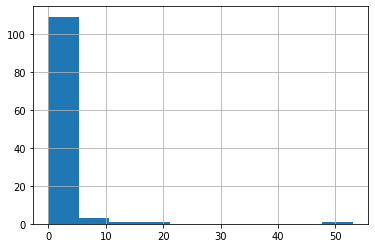

In [28]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count